## Data Cleaning

#### Import the datasets & Check if they have the same number of columns.

In [2]:
import pandas as pd

# Defining the file paths for the datasets
all_files = ["PitCount_2017.csv", "PitCount_2018.csv", "PitCount_2019.csv", "PitCount_2020.csv", "PitCount_2021.csv"]

# Initializing an empty list to store column names for each dataset
columns_list = []

# Looping through each dataset file
for file in all_files:
    # Read the dataset into a DataFrame
    df = pd.read_csv(file)
    
    # Extracting the column names and appending to the list
    columns_list.append(set(df.columns))

# Checking to see if all datasets have the same columns
if all(x == columns_list[0] for x in columns_list):
    print("All datasets have the exact same columns.")
else:
    print("Datasets have different columns.")

All datasets have the exact same columns.


Each dataset represents a different year. However, they do not have a year column. Adding a year column so that we can merge them into a unified dataset.

In [3]:
# Looping through each dataset file
for file in all_files:
    # Extracting the years from the file name
    year = int(file.split("_")[-1].split(".")[0])
    
    # Read the dataset into a DataFrame
    df = pd.read_csv(file)
    
    # Add a "Year" column with the corresponding year value
    df["Year"] = year
    
    # Saving the modified DataFrame back to the original file
    df.to_csv(file, index=False)

    print(f"Year column added to {file} and saved successfully.")


Year column added to PitCount_2017.csv and saved successfully.
Year column added to PitCount_2018.csv and saved successfully.
Year column added to PitCount_2019.csv and saved successfully.
Year column added to PitCount_2020.csv and saved successfully.
Year column added to PitCount_2021.csv and saved successfully.


In [4]:
# Confirming that the Year column was added.
pc17 = pd.read_csv("PitCount_2017.csv")

pc17.head()

,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth,Year
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,"1,128",170,133,825,445,678,4,...,3,9,12,0.0,21,6,15,21,0.0,2017
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,717,135,53,529,320,397,0,...,7,3,10,0.0,18,14,4,18,0.0,2017
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,"1,092",104,125,863,334,738,19,...,2,0,2,0.0,10,4,6,10,0.0,2017
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,606,116,35,455,222,383,1,...,3,9,12,0.0,18,6,12,18,0.0,2017
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,155,0,8,147,72,81,0,...,0,0,0,0.0,0,0,0,0,0.0,2017


Merging the datasets

In [5]:
# Initializing an empty list to store DataFrames
dfs = []

# Looping through each dataset file
for file in all_files:
    # Reading the dataset into a DataFrame
    df = pd.read_csv(file)
    
    # Appending the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames in the list into one
pc17_21 = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
print(pc17_21.head())


  CoC Number                                           CoC Name  \
0     AK-500                                      Anchorage CoC   
1     AK-501                        Alaska Balance of State CoC   
2     AL-500  Birmingham/Jefferson, St. Clair, Shelby Counti...   
3     AL-501            Mobile City & County/Baldwin County CoC   
4     AL-502                     Florence/Northwest Alabama CoC   

                       Count Types Overall Homeless  \
0  Sheltered and Unsheltered Count            1,128   
1  Sheltered and Unsheltered Count              717   
2  Sheltered and Unsheltered Count            1,092   
3  Sheltered and Unsheltered Count              606   
4  Sheltered and Unsheltered Count              155   

  Overall Homeless - Under 18 Overall Homeless - Age 18 to 24  \
0                         170                             133   
1                         135                              53   
2                         104                             125   
3     

In [6]:
# Checking the shape of the merged dataset.
pc17_21.shape

(1940, 543)

### Null values.

In [7]:
# Checking for any Null Values

pc17_21.isnull().sum()

CoC Number                                              10
CoC Name                                                10
Count Types                                             19
Overall Homeless                                        10
Overall Homeless - Under 18                             10
                                                        ..
Sheltered ES Homeless Children of Parenting Youth       10
Sheltered TH Homeless Children of Parenting Youth       10
Sheltered Total Homeless Children of Parenting Youth    10
Unsheltered Homeless Children of Parenting Youth        52
Year                                                     0
Length: 543, dtype: int64

In [8]:
# Getting the count of null values for each column.
null_counts = pc17_21.isnull().sum()

# Print columns with null values and their respective counts
print("Columns with null values:")
for column, null_count in null_counts.items():
    if null_count > 0:
        print(f"{column}: {null_count} null values")


Columns with null values:
CoC Number: 10 null values
CoC Name: 10 null values
Count Types: 19 null values
Overall Homeless: 10 null values
Overall Homeless - Under 18: 10 null values
Overall Homeless - Age 18 to 24: 10 null values
Overall Homeless - Over 24: 10 null values
Overall Homeless - Female: 10 null values
Overall Homeless - Male: 10 null values
Overall Homeless - Transgender: 10 null values
Overall Homeless - Gender that is not Singularly Female or Male: 10 null values
Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x): 10 null values
Overall Homeless - Hispanic/Latin(o)(a)(x): 10 null values
Overall Homeless - White: 10 null values
Overall Homeless - Black, African American, or African: 10 null values
Overall Homeless - Asian or Asian American: 10 null values
Overall Homeless - American Indian, Alaska Native, or Indigenous: 10 null values
Overall Homeless - Native Hawaiian or Other Pacific Islander: 10 null values
Overall Homeless - Multiple Races: 10 null values
Sheltered ES

#### Checking to see if any rows have more than 5 null values.

In [9]:
def count_rows_with_nulls_above_threshold(data, threshold):
    # Count the number of null values in each row
    null_counts = data.isnull().sum(axis=1)
    # Count the number of rows with null values above the threshold
    rows_above_threshold = (null_counts > threshold).sum()
    return rows_above_threshold

# Define the thresholds
thresholds = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Iterate through the thresholds and count rows with null values above each threshold
for threshold in thresholds:
    rows_above_threshold = count_rows_with_nulls_above_threshold(pc17_21, threshold)
    print(f"Number of rows with more than {threshold} null values: {rows_above_threshold}")



Number of rows with more than 2 null values: 70
Number of rows with more than 5 null values: 63
Number of rows with more than 10 null values: 55
Number of rows with more than 20 null values: 52
Number of rows with more than 30 null values: 49
Number of rows with more than 40 null values: 49
Number of rows with more than 50 null values: 46
Number of rows with more than 60 null values: 45
Number of rows with more than 70 null values: 40
Number of rows with more than 80 null values: 40
Number of rows with more than 90 null values: 35
Number of rows with more than 100 null values: 10


Dropping all the null values form CoC Name and CoC Number as we must not guess these columns

In [10]:
pc17_21 = pc17_21.dropna(subset=['CoC Number', 'CoC Name'])

print("Shape after removing null values:", pc17_21.shape)


Shape after removing null values: (1925, 543)


In [11]:
#looking at the unique values in column: Count Types
print(pc17_21['Count Types'].unique())

['Sheltered and Unsheltered Count' nan 'Sheltered-Only Count' 'aa'
 'Sheltered and Partial Unsheltered Count']


In [12]:
#removing all the columns with nan and aa as the values
pc17_21 = pc17_21.dropna(subset=['Count Types'])

In [13]:
# Get the count of null values for each column
null_counts2 = pc17_21.isnull().sum()

# Print columns with null values and their respective counts
print("Columns with null values after dealing with three columns:")
for column, null_count in null_counts2.items():
    if null_count > 0:
        print(f"{column}: {null_count} null values")

Columns with null values after dealing with three columns:
Unsheltered Homeless - Under 18: 32 null values
Unsheltered Homeless - Age 18 to 24: 35 null values
Unsheltered Homeless - Over 24: 35 null values
Unsheltered Homeless - Female: 34 null values
Unsheltered Homeless - Male: 34 null values
Unsheltered Homeless - Transgender: 35 null values
Unsheltered Homeless - Gender that is not Singularly Female or Male: 34 null values
Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x): 36 null values
Unsheltered Homeless - Hispanic/Latin(o)(a)(x): 35 null values
Unsheltered Homeless - White: 35 null values
Unsheltered Homeless - Black, African American, or African: 35 null values
Unsheltered Homeless - Asian or Asian American: 35 null values
Unsheltered Homeless - American Indian, Alaska Native, or Indigenous: 35 null values
Unsheltered Homeless - Native Hawaiian or Other Pacific Islander: 35 null values
Unsheltered Homeless - Multiple Races: 34 null values
Unsheltered Homeless Individuals

The number of columns with null values have dropped significantly by just dealing with the three columns. Now we will confirm whether all these columns with null values are only num type. If so we will replace nan with 0. This is an appropriate solution because it is highly likely that the CoC did not survey that specific group of homeless population for the given year.

In [14]:
null_columns = pc17_21.columns[pc17_21.isnull().any()]

# Filter columns with null values that are numeric type
numeric_null_columns = [col for col in null_columns if pc17_21[col].dtype == 'float64' or pc17_21[col].dtype == 'int64']

if len(numeric_null_columns) == len(null_columns):
    print("All columns with null values are numeric type.")
else:
    print("Columns with null values include non-numeric types.")

Columns with null values include non-numeric types.


Finding the non-numeric columns.

In [15]:
#finding the non numeric column.
null_columns = pc17_21.columns[pc17_21.isnull().any()]

# Filter non-numeric columns with null values
non_numeric_null_columns = [col for col in null_columns if pc17_21[col].dtype not in ['float64', 'int64']]

print("Non-numeric columns with null values:")
print(non_numeric_null_columns)

Non-numeric columns with null values:
['Unsheltered Homeless - Under 18', 'Unsheltered Homeless - Age 18 to 24', 'Unsheltered Homeless - Over 24', 'Unsheltered Homeless - Female', 'Unsheltered Homeless - Male', 'Unsheltered Homeless - Transgender', 'Unsheltered Homeless - Gender that is not Singularly Female or Male', 'Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x)', 'Unsheltered Homeless - Hispanic/Latin(o)(a)(x)', 'Unsheltered Homeless - White', 'Unsheltered Homeless - Black, African American, or African', 'Unsheltered Homeless - Asian or Asian American', 'Unsheltered Homeless - American Indian, Alaska Native, or Indigenous', 'Unsheltered Homeless - Native Hawaiian or Other Pacific Islander', 'Unsheltered Homeless - Multiple Races', 'Unsheltered Homeless Individuals', 'Unsheltered Homeless Individuals - Under 18', 'Unsheltered Homeless Individuals - Age 18 to 24', 'Unsheltered Homeless Individuals - Over 24', 'Unsheltered Homeless Individuals - Female', 'Unsheltered Homeless 

Dealing with numeric column with null values.

In [16]:
numeric_null_columns = [col for col in pc17_21.columns if pc17_21[col].dtype in ['float64', 'int64'] and pc17_21[col].isnull().any()]

# Replace NaN values with 0 in numerical columns
pc17_21[numeric_null_columns] = pc17_21[numeric_null_columns].fillna(0)

# Check if all null values in numerical columns have been replaced
if pc17_21[numeric_null_columns].isnull().sum().sum() == 0:
    print("All null values in numerical columns have been replaced with 0.")
else:
    print("Some null values in numerical columns remain.")

All null values in numerical columns have been replaced with 0.


Checking how many columns left with null values

In [17]:
# Get the count of null values for each column
null_counts3 = pc17_21.isnull().sum()

# Print columns with null values and their respective counts
print("Columns with null values:")
for column, null_count in null_counts3.items():
    if null_count > 0:
        print(f"{column}: {null_count} null values")

Columns with null values:
Unsheltered Homeless - Under 18: 32 null values
Unsheltered Homeless - Age 18 to 24: 35 null values
Unsheltered Homeless - Over 24: 35 null values
Unsheltered Homeless - Female: 34 null values
Unsheltered Homeless - Male: 34 null values
Unsheltered Homeless - Transgender: 35 null values
Unsheltered Homeless - Gender that is not Singularly Female or Male: 34 null values
Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x): 36 null values
Unsheltered Homeless - Hispanic/Latin(o)(a)(x): 35 null values
Unsheltered Homeless - White: 35 null values
Unsheltered Homeless - Black, African American, or African: 35 null values
Unsheltered Homeless - Asian or Asian American: 35 null values
Unsheltered Homeless - American Indian, Alaska Native, or Indigenous: 35 null values
Unsheltered Homeless - Native Hawaiian or Other Pacific Islander: 35 null values
Unsheltered Homeless - Multiple Races: 34 null values
Unsheltered Homeless Individuals: 25 null values
Unsheltered Home

In [18]:
#Looking for the unique values in these columns that were not considered numeric.
null_counts = pc17_21.isnull().sum()

# Print columns with null values and their respective counts
print("Columns with null values:")
for column, null_count in null_counts.items():
    if null_count > 0:
        print(f"{column}: {null_count} null values")
        unique_values = pc17_21[column].unique()
        print(f"Unique values in {column}: {unique_values}\n")

Columns with null values:
Unsheltered Homeless - Under 18: 32 null values
Unique values in Unsheltered Homeless - Under 18: ['0' '10' '1' '3' '42' '27' '12' '33' '24' '664' '101' '76' '7' '119' '46'
 '270' '32' '242' '6' '34' '9' '56' '8' '2' '18' '38' '39' '4' '16' '17'
 '49' '84' '20' '48' '726' '219' '25' '107' '35' '11' '13' '40' '29' '31'
 '30' '507' '55' '23' '5' '19' '490' '124' '43' '15' '93' '303' '170'
 '153' '44' '21' '22' '58' '175' '120' '139' '106' '92' '14' '26' '241'
 '113' '67' '51' '129' '1,167' '75' '131' '218' '60' '236' '237' '140'
 '80' '54' '57' '36' '936' '248' '73' '52' '47' '163' '110' '294' '178'
 '127' '105' '297' '37' '112' '212' '78' '97' '931' '28' '91' '150' '180'
 '245' '148' '45' '397' '346' '125' '155' '159' '901' '261' '247' '68'
 '61' '388' '104' '282' '87' '168' '585' '77' '267' '66' '1,415' '50'
 '230' '59' '62' '69' '64' '1,628' '83' '274' '109' '238' '136' '108'
 '269' '409' '41' '964' '100' '196' '284' '654' '265' nan '913' '280'
 '154' '173' '

We see that there a commas being used to separate the numbers at the thousand level. Going to replace all the commas after the third column.

In [19]:
# Function to remove commas and convert to float
def remove_commas_and_convert_to_float(value):
    if pd.isnull(value):
        return value
    else:
        try:
            return float(value.replace(',', ''))
        except AttributeError:  # Handling the case if it's already a float
            return value
        
# Apply the function to columns starting from the fourth column
for col in pc17_21.columns[3:]:
    pc17_21[col] = pc17_21[col].apply(remove_commas_and_convert_to_float)




Replacing the null values with 0s.

In [20]:
# Find columns with null values
columns_with_null_values = pc17_21.columns[pc17_21.isnull().any()]

# Replace null values with 0
pc17_21[columns_with_null_values] = pc17_21[columns_with_null_values].fillna(0)

# Verify that null values have been replaced
print("Null values replaced with 0:")



Null values replaced with 0:


In [21]:
# Check if there are any null values remaining in the dataset
if pc17_21.isnull().any().any():
    print("There are still null values remaining in the dataset.")
else:
    print("There are no null values remaining in the dataset.")


There are no null values remaining in the dataset.


In [22]:
pc17_21.head(5)

,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth,Year
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,1128.0,170.0,133.0,825.0,445.0,678.0,4.0,...,3.0,9.0,12.0,0.0,21.0,6.0,15.0,21.0,0.0,2017
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,717.0,135.0,53.0,529.0,320.0,397.0,0.0,...,7.0,3.0,10.0,0.0,18.0,14.0,4.0,18.0,0.0,2017
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,1092.0,104.0,125.0,863.0,334.0,738.0,19.0,...,2.0,0.0,2.0,0.0,10.0,4.0,6.0,10.0,0.0,2017
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,606.0,116.0,35.0,455.0,222.0,383.0,1.0,...,3.0,9.0,12.0,0.0,18.0,6.0,12.0,18.0,0.0,2017
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,155.0,0.0,8.0,147.0,72.0,81.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017


In [23]:
print(pc17_21.dtypes)

CoC Number                                               object
CoC Name                                                 object
Count Types                                              object
Overall Homeless                                        float64
Overall Homeless - Under 18                             float64
                                                         ...   
Sheltered ES Homeless Children of Parenting Youth       float64
Sheltered TH Homeless Children of Parenting Youth       float64
Sheltered Total Homeless Children of Parenting Youth    float64
Unsheltered Homeless Children of Parenting Youth        float64
Year                                                      int64
Length: 543, dtype: object


## Exploratory Analysis

In [29]:
for c in pc17_21.columns:
    print(c)


CoC Number
CoC Name
Count Types
Overall Homeless
Overall Homeless - Under 18
Overall Homeless - Age 18 to 24
Overall Homeless - Over 24
Overall Homeless - Female
Overall Homeless - Male
Overall Homeless - Transgender
Overall Homeless - Gender that is not Singularly Female or Male
Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x)
Overall Homeless - Hispanic/Latin(o)(a)(x)
Overall Homeless - White
Overall Homeless - Black, African American, or African
Overall Homeless - Asian or Asian American
Overall Homeless - American Indian, Alaska Native, or Indigenous
Overall Homeless - Native Hawaiian or Other Pacific Islander
Overall Homeless - Multiple Races
Sheltered ES Homeless
Sheltered ES Homeless - Under 18
Sheltered ES Homeless - Age 18 to 24
Sheltered ES Homeless - Over 24
Sheltered ES Homeless - Female
Sheltered ES Homeless - Male
Sheltered ES Homeless - Transgender
Sheltered ES Homeless - Gender that is not Singularly Female or Male
Sheltered ES Homeless - Non-Hispanic/Non-Latin(o)(a)(

#### Sections to explore:
- Overall Homeless Population
- Sheltered Vs. Unsheltered homeless population
- The chronically homeless.

/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_6490/3662989539.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Overall Homeless', data=pc17_21, ci=None)  # ci=None disables error bars


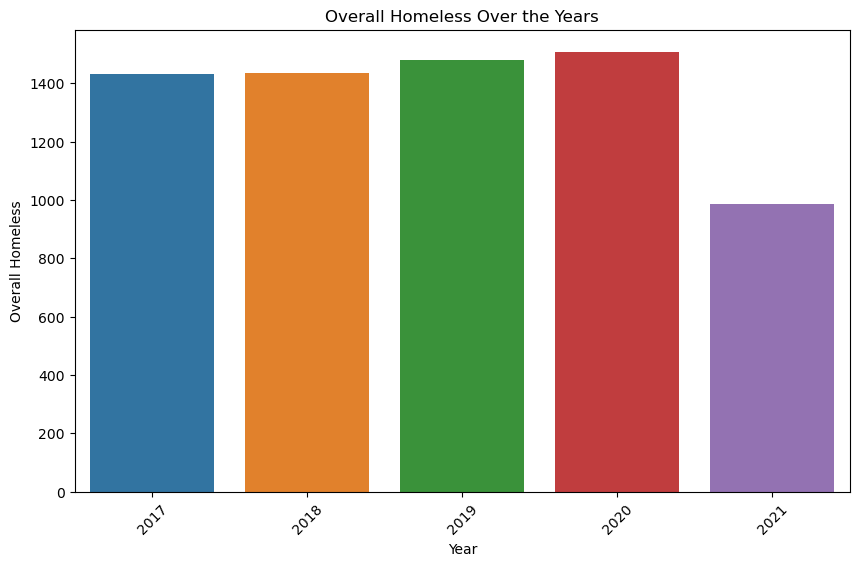

In [31]:
#Visualizing Overall Homeless from 2017 - 2021

import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='Year', y='Overall Homeless', data=pc17_21, ci=None)  # ci=None disables error bars

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years')
plt.xlabel('Year')
plt.ylabel('Overall Homeless')

# Show plot
plt.show()

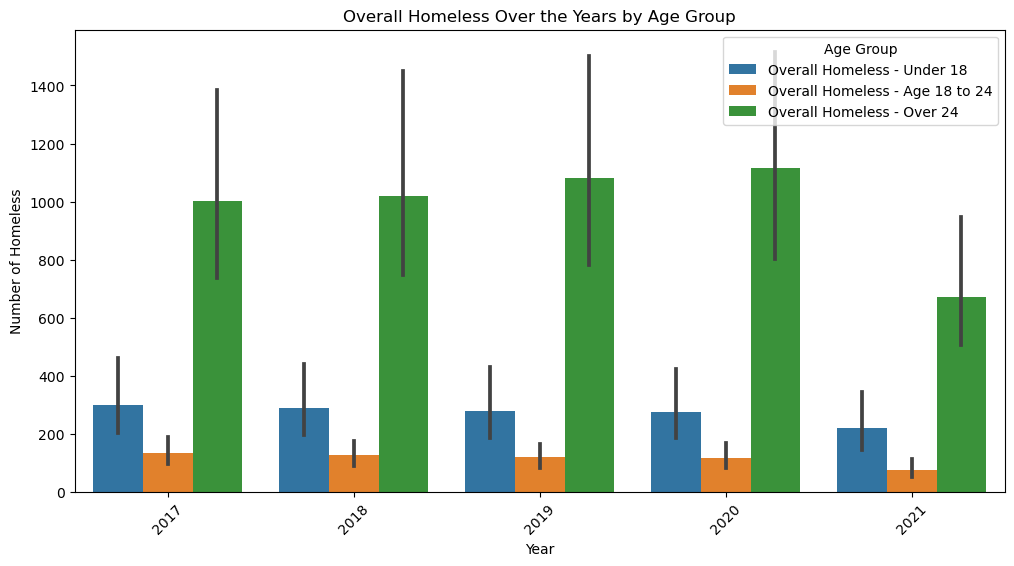

In [34]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Melt the DataFrame to reshape it for seaborn
melted_df = pc17_21.melt(id_vars=['Year'], 
                    value_vars=['Overall Homeless - Under 18', 
                                'Overall Homeless - Age 18 to 24', 
                                'Overall Homeless - Over 24'], 
                    var_name='Age Group', 
                    value_name='Number of Homeless')

# Create the bar plot
sns.barplot(x='Year', y='Number of Homeless', hue='Age Group', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years by Age Group')
plt.xlabel('Year')
plt.ylabel('Number of Homeless')

# Show plot
plt.legend(title='Age Group')
plt.show()

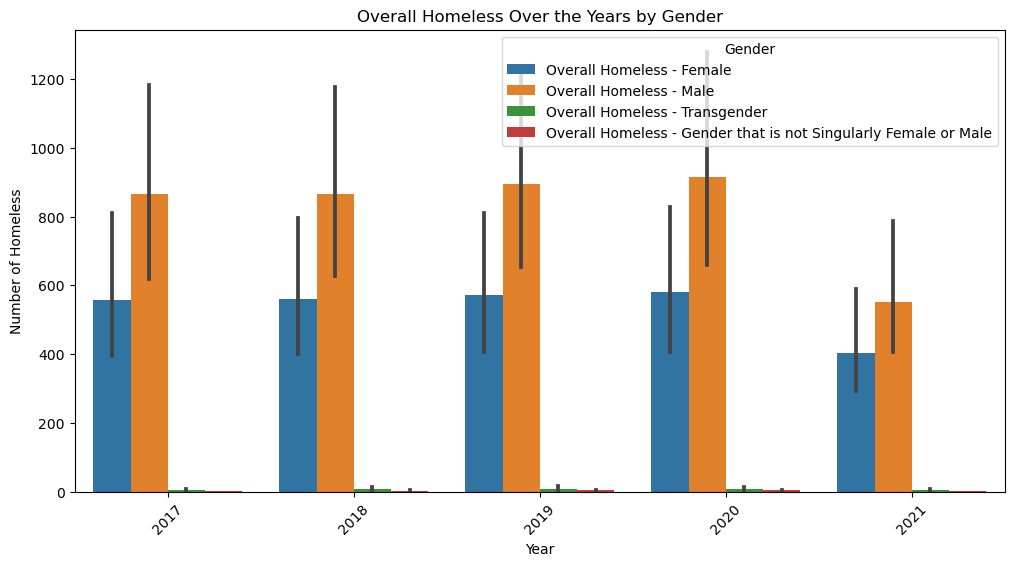

In [36]:
#Homelessness among the genders over the time.

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Melt the DataFrame to reshape it for seaborn
melted_df = pc17_21.melt(id_vars=['Year'], 
                    value_vars=['Overall Homeless - Female', 
                                'Overall Homeless - Male', 
                                'Overall Homeless - Transgender',
                                'Overall Homeless - Gender that is not Singularly Female or Male'], 
                    var_name='Gender', 
                    value_name='Number of Homeless')

# Create the bar plot
sns.barplot(x='Year', y='Number of Homeless', hue='Gender', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Homeless')

# Show plot
plt.legend(title='Gender')
plt.show()